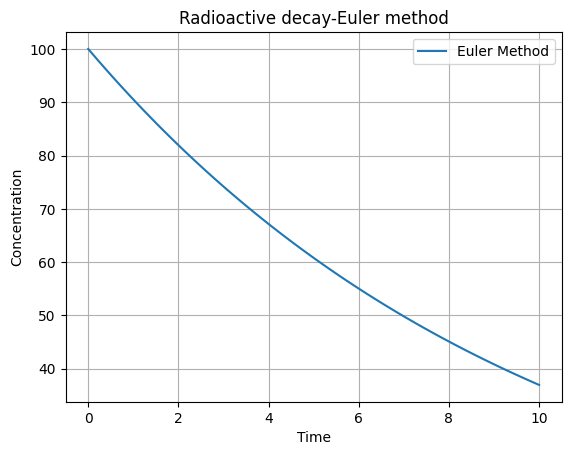

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Euler
def radioactive_decay(decay_constant, initial_concentration, dt, steps):
    data = np.zeros(steps)
    data[0] = initial_concentration

    for i in range(1, steps):
        data[i] = data[i - 1] - decay_constant * data[i - 1] * dt

    return data

#parametry do zmiany!
decay_constant = 0.1  #stala rozpadu
initial_concentration = 100  #stezenie na poczatku, N_0
dt = 0.1  #czas
steps = 100  #kroki



data = radioactive_decay(decay_constant, initial_concentration, dt, steps)


time = np.linspace(0, dt * steps, steps)
plt.plot(time, data, label="Euler Method")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Radioactive decay-Euler method")
plt.legend()
plt.grid()
plt.show()


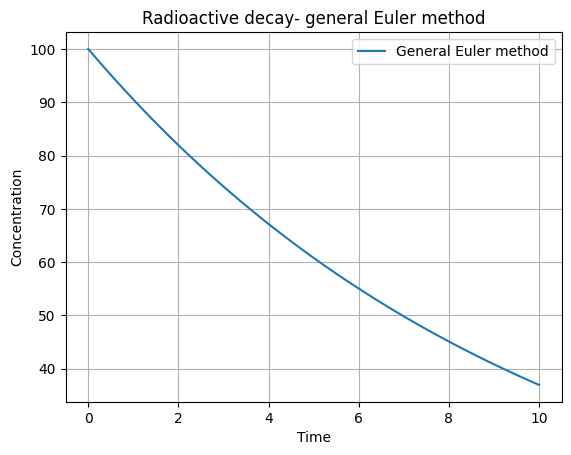

In [107]:
#general euler
def euler_method(func, initial, t_start, t_finish, steps=100, params=[]):
    dt = (t_finish - t_start) / steps
    data = []
    t = t_start
    data.append(initial)

    for i in range(1,steps):
        data.append(data[-1] + dt * func(data[-1], t, params))
        t += dt

    return np.array(data)

#funkcja rozpad promieniotworczy
def radioactive_decay(x, t, params):
    decay_constant = params
    return -decay_constant * x

#parametry
t_start = 0
t_finish = 10



data_euler_general = euler_method(radioactive_decay, initial_concentration, t_start, t_finish, steps, decay_constant)


time = np.linspace(t_start, t_finish, steps)
plt.plot(time, data_euler_general, label="General Euler method")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Radioactive decay- general Euler method")
plt.legend()
plt.grid()
plt.show()


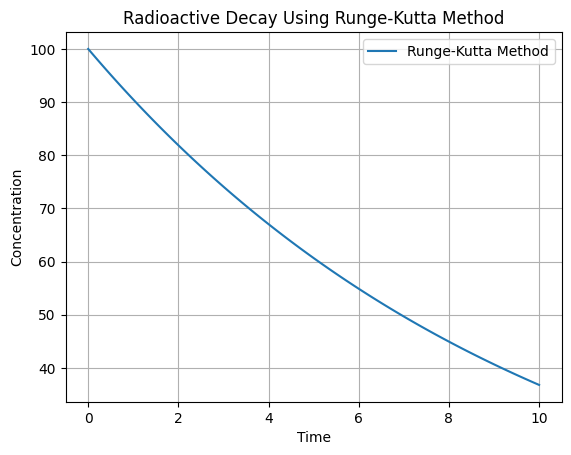

In [108]:
#metoda Runge-Kutta 4. rzędu
def runge_kutta_method(func, initial, t_start, t_finish, steps=100, params=[]):
    dt = (t_finish - t_start) / steps
    data = [initial]
    t = t_start

    for i in range(steps):
        k1 = dt * func(data[-1], t, params)
        k2 = dt * func(data[-1] + 0.5 * k1, t + 0.5 * dt, params)
        k3 = dt * func(data[-1] + 0.5 * k2, t + 0.5 * dt, params)
        k4 = dt * func(data[-1] + k3, t + dt, params)

        data.append(data[-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
        t += dt

    return np.array(data)

data_rk = runge_kutta_method(radioactive_decay, initial_concentration, t_start, t_finish, steps, decay_constant)
time = np.linspace(t_start, t_finish, steps + 1)

plt.plot(time, data_rk, label="Runge-Kutta Method")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Radioactive Decay Using Runge-Kutta Method")
plt.legend()
plt.grid()
plt.show()


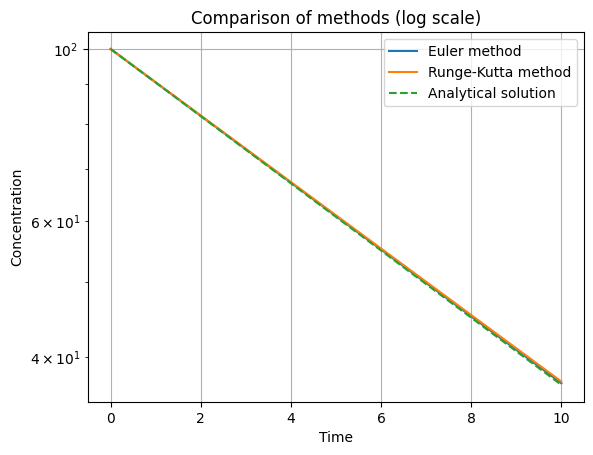

In [109]:
def solve_ode(method, func, initial, t_start, t_finish, steps=100, params=[]):
    dt = (t_finish - t_start) / steps
    data = [initial]
    t = t_start

    for i in range(steps - 1):
        if method == "euler":
            data.append(data[-1] + dt * func(data[-1], t, params))
        elif method == "rk4":  # Runge-Kutta 4th order
            k1 = dt * func(data[-1], t, params)
            k2 = dt * func(data[-1] + 0.5 * k1, t + 0.5 * dt, params)
            k3 = dt * func(data[-1] + 0.5 * k2, t + 0.5 * dt, params)
            k4 = dt * func(data[-1] + k3, t + dt, params)
            data.append(data[-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
        else:
            raise ValueError("choose 'euler' or 'rk4'")
        t += dt

    return np.array(data)



#f.analityczna
def analytical_solution(t, initial_concentration, decay_constant):
    return initial_concentration * np.exp(-decay_constant * t)

#parametry
initial_concentration = 100
decay_constant = 0.1
t_start = 0
t_finish = 10
steps = 100



time = np.linspace(t_start, t_finish, steps)
data_euler = solve_ode("euler", radioactive_decay, initial_concentration, t_start, t_finish, steps, decay_constant)
data_rk4 = solve_ode("rk4", radioactive_decay, initial_concentration, t_start, t_finish, steps, decay_constant)
analytical = analytical_solution(time, initial_concentration, decay_constant)

#wykres
plt.plot(time, data_euler, label="Euler method")
plt.plot(time, data_rk4, label="Runge-Kutta method")
plt.plot(time, analytical, label="Analytical solution", linestyle="dashed")
plt.yscale("log")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Comparison of methods (log scale)")
plt.legend()
plt.grid()
plt.show()



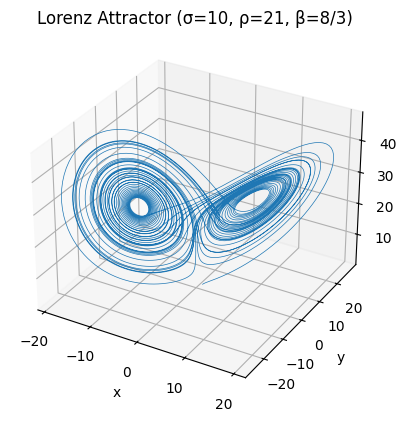

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#uklad lorentza
def lorenz(state, t, params):
    sigma, ro, beta = params
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (ro - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])

#solver ODE
def solve_ode_system(func, initial_state, t_start, t_finish, steps, params):
    dt = (t_finish - t_start) / steps
    data = [initial_state]
    t = t_start

    for _ in range(steps):
        current_state = data[-1]
        k1 = dt * func(current_state, t, params)
        k2 = dt * func(current_state + 0.5 * k1, t + 0.5 * dt, params)
        k3 = dt * func(current_state + 0.5 * k2, t + 0.5 * dt, params)
        k4 = dt * func(current_state + k3, t + dt, params)
        next_state = current_state + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        data.append(next_state)
        t += dt

    return np.array(data)

#bonus question
ro = 28.0
sigma = 10.0
beta = 8.0 / 3.0
params = (sigma, ro, beta)


initial_state = [1.0, 1.0, 1.0]
t_start = 0
t_finish = 50
steps = 10000

#uklad lorentza
time = np.linspace(t_start, t_finish, steps)
solution = solve_ode_system(lorenz, initial_state, t_start, t_finish, steps, params)

#wykres 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(solution[:, 0], solution[:, 1], solution[:, 2], lw=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Lorenz Attractor (σ=10, ρ=21, β=8/3)")
plt.show()
